## CASO4

In [1]:
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

# Importamos los datos y creamos un data frame
iris = datasets.load_iris()
X =iris.data[:, :2] 
y =iris.target
iris = sns.load_dataset("iris")

df=pd.DataFrame(iris)

In [2]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
print("Caracteristicas")
df.groupby("species").size()

Caracteristicas


species
setosa        50
versicolor    50
virginica     50
dtype: int64

        Modelo de KNN

In [5]:

#No es necesario tener en cuenta la variable "species" por lo que la borraremos
df=df.drop("species", axis=1)

In [6]:
# transfromacion de valores en variables categoricas
df["sepal_widthCat"] = pd.qcut(df["sepal_width"], 3, retbins=False, labels=[1, 2, 3])
df["sepal_widthCat"]


0      3
1      2
2      2
3      2
4      3
      ..
145    2
146    1
147    2
148    3
149    2
Name: sepal_widthCat, Length: 150, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   sepal_length    150 non-null    float64 
 1   sepal_width     150 non-null    float64 
 2   petal_length    150 non-null    float64 
 3   petal_width     150 non-null    float64 
 4   sepal_widthCat  150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


Aqui dividiremos los datos en un 75% de entrenamiento y el 25% restante seran los datos de prueba

In [8]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)
print(' {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))

 112 datos para entrenamiento y 38 datos para prueba


In [9]:
# Escalado de características para la clasificación
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Los datos ya fueron divididos y agrupados. Ahora para poder realizar la predicción utilizaremos un modelo con 5 vecinos 

            Predicción de la clasificación

In [10]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:

y_pred = classifier.predict(X_test)

In [12]:
acc =  classifier.score(X_test, y_test)
print(acc) # 78.94%

0.7894736842105263


Este resultado nos indica que usando el clasificador, acertamos un 78.9% de las clases, dandonos un resultado muy positivo

            MATRIZ DE CONFUSION

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.64      0.64      0.64        11
           2       0.67      0.67      0.67        12

    accuracy                           0.79        38
   macro avg       0.77      0.77      0.77        38
weighted avg       0.79      0.79      0.79        38



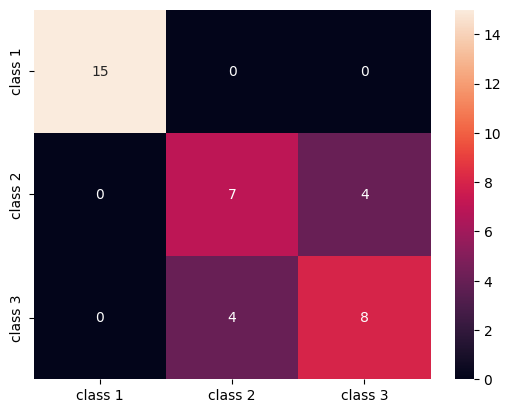

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

Observando la matriz de confusión logramos identificar lo siguiente:


* la clase 1 no  se confundio nunca con las otras clases 
* la clase 3 se confundió mayoritariamente con la clase 2, en 4 entradas
* En la diagonal observamos que las clases que mas se confunden son la 2 y 3

None 0.7466666666666667
0.2 0.7466666666666667


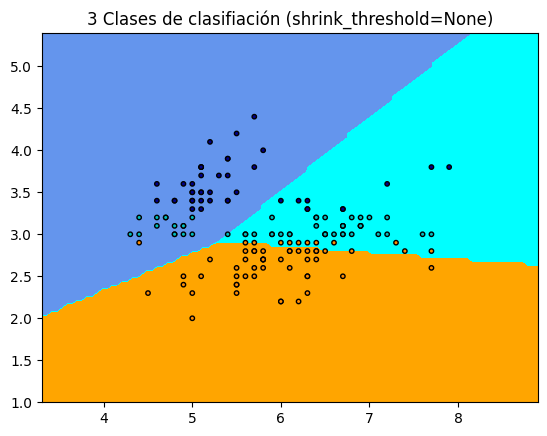

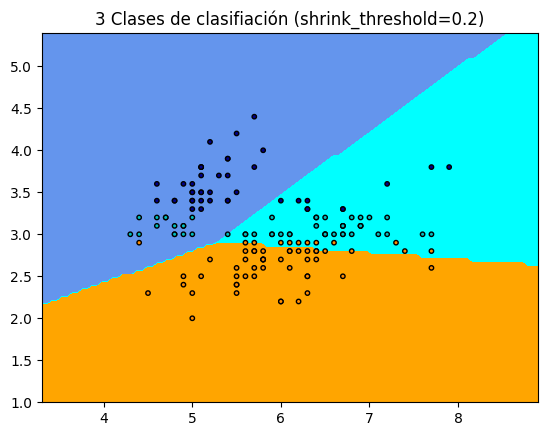

In [14]:
import numpy as np
from matplotlib.colors import ListedColormap


from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import NearestCentroid

# Suponiendo que X es un DataFrame de pandas
X_2d = X
y = df['sepal_widthCat']


# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ListedColormap(["darkorange", "c", "darkblue"])

for shrinkage in [None, 0.2]:
    # we create an instance of Nearest Centroid Classifier and fit the data.
    clf = NearestCentroid(shrink_threshold=shrinkage)
    clf.fit(X_2d, y)
    y_pred = clf.predict(X_2d)
    print(shrinkage, np.mean(y == y_pred))

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf, X_2d, cmap=cmap_light, ax=ax, response_method="predict"
    )

    # Plot also the training points
    plt.scatter(X_2d[:, 0],X_2d[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=10)
    plt.title("3 Clases de clasifiación (shrink_threshold=%r)" % shrinkage)
    plt.axis("tight")

plt.show()

### ¿Cuál es el mejor valor de k?

In [15]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 50
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 3 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

(0.675, 0.85)

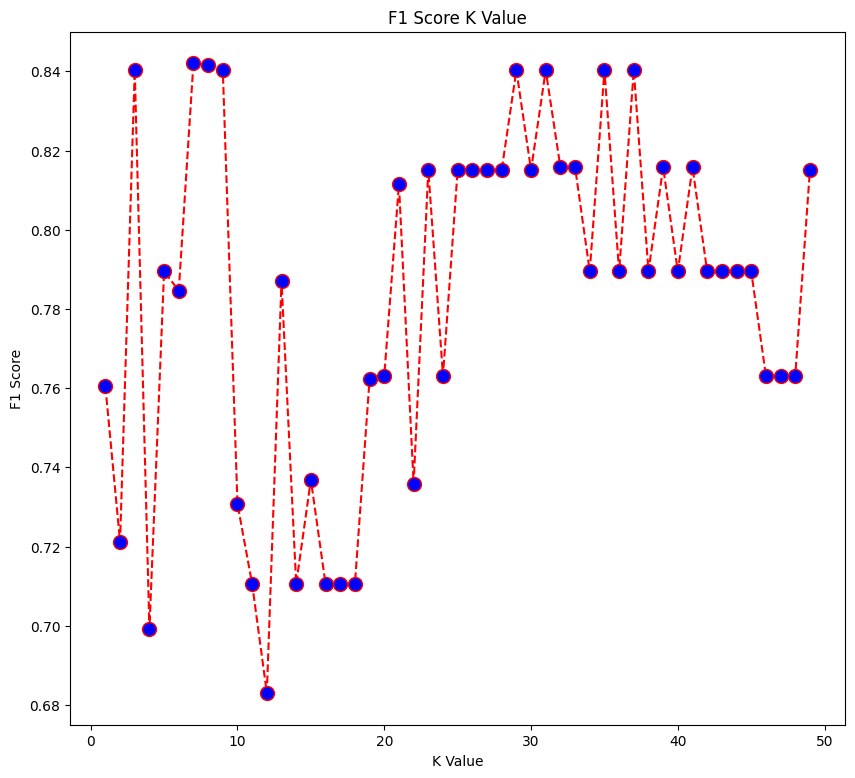

In [16]:
plt.figure(figsize=(10, 9))
plt.plot(range(1, 50), f1s, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')
plt.ylim(0.675, 0.85)

La grafica nos permite ver el valor que toma cada F1 vs K. Por esta razon para elegir el mejor K, va a ser necesario observar cual es el valor de 'K' que mejor F1 nos puede dar. El mejor valor de 'k' es el que de un mayor valor de F1

En este caso el valor mayor seria entre un 6 y 7 

In [17]:
classifier15 = KNeighborsClassifier(n_neighbors=6)
classifier15.fit(X_train, y_train)
y_pred15 = classifier15.predict(X_test)
print(classification_report(y_test, y_pred15))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.60      0.82      0.69        11
           2       0.75      0.50      0.60        12

    accuracy                           0.79        38
   macro avg       0.78      0.77      0.76        38
weighted avg       0.81      0.79      0.78        38



In [18]:
classifier15 = KNeighborsClassifier(n_neighbors=7)
classifier15.fit(X_train, y_train)
y_pred15 = classifier15.predict(X_test)
print(classification_report(y_test, y_pred15))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.73      0.73      0.73        11
           2       0.75      0.75      0.75        12

    accuracy                           0.84        38
   macro avg       0.83      0.83      0.83        38
weighted avg       0.84      0.84      0.84        38



Podemos observar que al tomar un n_neighbors=7 nos da un valor de accuracy mayor, siendo de 84%. Por lo que podremos concluir que el mejor valor de K es 7

### REGRESION LOGISTICA MULTINOMIAL

In [19]:
pip install mlxtend 

Note: you may need to restart the kernel to use updated packages.


In [20]:
from sklearn.datasets import load_iris

# cargamos el dataset
iris = load_iris()

print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [21]:
# dataframe 
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
X = data.drop(["species"],axis = 1)
y = data.species
     

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [24]:
# Definimos la configuración del clasificador
from sklearn.linear_model import LogisticRegression
logisticRegrIris = LogisticRegression(max_iter=1000)

Aqui vamos a dividir los datos de entrenamiento y despues empezara la prediccion de la regresion

In [25]:
logisticRegrIris.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.96      0.98        23
           2       0.91      1.00      0.95        10

    accuracy                           0.98        45
   macro avg       0.97      0.99      0.98        45
weighted avg       0.98      0.98      0.98        45



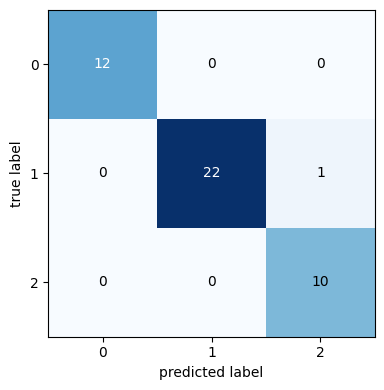

In [26]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
ypred = logisticRegrIris.predict(X_test)
matriz = confusion_matrix(y_test,ypred)

plot_confusion_matrix(conf_mat=matriz, figsize=(4,4), show_normed=False)
plt.tight_layout()
print(classification_report(y_test, ypred))

CONCLUSIÓN:

* Se puede observar que pudo predecir 45 datos con un 96% de predicción, lo que quiere decir que el modelo
es capaz de predecir las categorías.
* La clase 3 tiene el numero menor de support pero al tener un buen f1 socre esta realizando bien la clasificación.  
* La precisión y la recuperación son altas para todas las clases, lo que significa que el modelo tiene una baja tasa de falsos positivos y falsos negativos.
* puntajes F1 son altos para todas las clases, indica que el modelo tiene un buen equilibrio entre precisión y recuperación en general.
* La precisión, recuperación y puntaje F1 promedio ponderados también son del 96%, lo que indica un buen rendimiento general del modelo.



En resumen, estos resultados sugieren que el modelo de regresión multinomial es efectivo en la clasificación de las tres clases, con una precisión general alta y un buen equilibrio entre precisión y recuperación.
